In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd

In [21]:
data = pd.read_csv('./csv/multi_classification_data.csv')

In [22]:
# Splitting the data into features and targets
X = data.iloc[:, :-7]
y_with_other = data.iloc[:, -7:]
y_without_other = data.iloc[:, -8:-1]

# Splitting the data into train and test sets
X_train_with, X_test_with, y_train_with, y_test_with = train_test_split(X, y_with_other, test_size=0.2, random_state=42)
X_train_without, X_test_without, y_train_without, y_test_without = train_test_split(X, y_without_other, test_size=0.2, random_state=42)

# Create a Gradient Boosting classifier
clf_with = GradientBoostingClassifier(random_state=42)
clf_without = GradientBoostingClassifier(random_state=42)

# Train the models
clf_with.fit(X_train_with, y_train_with.idxmax(axis=1))
clf_without.fit(X_train_without, y_train_without.idxmax(axis=1))

# Make predictions
y_pred_with = clf_with.predict(X_test_with)
y_pred_without = clf_without.predict(X_test_without)

# Calculate the classification reports
report_with = classification_report(y_test_with.idxmax(axis=1), y_pred_with)
report_without = classification_report(y_test_without.idxmax(axis=1), y_pred_without)

In [23]:
# Print the classification reports
print('With other defaults:\n', report_with)
print('Without other defaults:\n', report_without)

With other defaults:
               precision    recall  f1-score   support

       Bumps       0.62      0.64      0.63        72
   Dirtiness       0.60      0.75      0.67         8
    K_Scatch       0.95      0.95      0.95        83
Other_Faults       0.74      0.76      0.75       143
      Pastry       0.68      0.59      0.63        29
      Stains       1.00      0.92      0.96        13
   Z_Scratch       0.97      0.90      0.94        41

    accuracy                           0.79       389
   macro avg       0.80      0.79      0.79       389
weighted avg       0.79      0.79      0.79       389

Without other defaults:
                 precision    recall  f1-score   support

         Bumps       0.61      0.64      0.62        70
     Dirtiness       0.60      0.75      0.67         8
      K_Scatch       0.85      0.85      0.85        13
        Pastry       0.76      0.59      0.67        27
SigmoidOfAreas       0.85      0.87      0.86       223
        Stains     

GradientBoostingClassifier의 경우 튜닝을 고려할 수 있는 몇 가지 주요 하이퍼파라미터가 있습니다:  

1. n_estimators: 수행할 부스팅 단계의 수입니다. 그라디언트 부스팅은 과적합에 상당히 강하므로 일반적으로 숫자가 많을수록 성능이 향상됩니다.  
2. learning_rate: 각 트리가 최종 결과에 미치는 영향을 결정합니다. GBM은 각 트리의 출력을 사용하여 업데이트되는 초기 추정치로 시작하여 작동합니다. 학습 매개변수는 이러한 추정치 변화의 크기를 제어합니다.
3. 최대_뎁스: 개별 회귀 추정기의 최대 깊이입니다. 최대 깊이는 트리의 노드 수를 제한합니다.  
4. MIN_SAMPS_SPLIT: 내부 노드를 분할하는 데 필요한 최소 샘플 수입니다.  
5. MIN_SAMPS_LEAF: 리프 노드에 필요한 최소 샘플 수입니다.  
여기서는 이러한 하이퍼파라미터를 조정하기 위해 sklearn.model_selection의 GridSearchCV를 사용하겠습니다. GridSearchCV는 하이퍼파라미터 튜닝을 수행하는 데 사용되는 메서드입니다. 이 방법은 지정한 다양한 매개 변수에 대해 모델을 여러 번 훈련한 다음 가장 성능이 좋은 매개 변수를 반환하는 방식으로 작동합니다.

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [25]:
# Define the GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

# Define a smaller parameter distribution
param_dist_small = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Instantiate the randomized search model with smaller distribution
rand_search_small = RandomizedSearchCV(estimator=gb, param_distributions=param_dist_small, 
                                       n_iter=9, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the randomized search to the data
rand_search_small.fit(X_train_without, y_train_without.idxmax(axis=1))

rand_search_small.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


{'n_estimators': 150, 'learning_rate': 0.1}

위 하이퍼파라미터를 사용하여 그라디언트 부스팅으로 훈련하고 성능을 평가

In [38]:
data = pd.read_csv('./csv/multi_classification_data.csv')

# Define the feature set 'X' and the target set 'y'
X = data.iloc[:, :-7]
y = data.iloc[:, -7:]

# Define the target set without the 'Other_Faults' column
y_without_other = y.drop('Other_Faults', axis=1)

# Split the data without 'Other_Faults' into training and validation sets
X_train_without, X_val_without, y_train_without, y_val_without = train_test_split(
    X, y_without_other, test_size=0.2, random_state=42, stratify=y_without_other)

# Train the Gradient Boosting Classifier with the best hyperparameters
best_gb = GradientBoostingClassifier(n_estimators=140, learning_rate=0.3, random_state=42)
best_gb.fit(X_train_without, y_train_without.idxmax(axis=1))

# Predict the classes on validation data
y_pred_without_best_gb = best_gb.predict(X_val_without)

# Compute the classification report
classification_report_without_best_gb = classification_report(y_val_without.idxmax(axis=1), y_pred_without_best_gb)
print('result:\n', classification_report_without_best_gb)


result:
               precision    recall  f1-score   support

       Bumps       0.77      0.67      0.72        81
   Dirtiness       1.00      0.64      0.78        11
    K_Scatch       0.99      0.97      0.98        78
      Pastry       0.80      0.90      0.85       167
      Stains       1.00      0.93      0.96        14
   Z_Scratch       1.00      0.89      0.94        38

    accuracy                           0.86       389
   macro avg       0.93      0.83      0.87       389
weighted avg       0.87      0.86      0.86       389



위의 점수가 지금까지 내가 한 작업 중에서 가장 높은 점수임.  (0.86)
아래 스무트 -> 그라디언트 부스팅  : 0.83  
     스무트 -> 다중 신경망 : 0.42 

돌려본 결과로는 머신러닝이 딥러닝보다 훨씬 성능이 높게 평가됨.

In [40]:
from imblearn.over_sampling import SMOTE

data = pd.read_csv('./csv/multi_classification_data.csv')

# Define the feature set 'X' and the target set 'y'
X = data.iloc[:, :-7]
y = data.iloc[:, -7:]

# Define the target set without the 'Other_Faults' column
y_without_other = y.drop('Other_Faults', axis=1)

# Convert one-hot encoded target to labels
y_label = y_without_other.idxmax(axis=1)  # Get column name (label) of max value in each row

# Split the data without 'Other_Faults' into training and validation sets
X_train_without, X_val_without, y_train_without_label, y_val_without_label = train_test_split(
    X, y_label, test_size=0.2, random_state=42, stratify=y_label)

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Oversample the training dataset
X_train_res, y_train_res = smote.fit_resample(X_train_without, y_train_without_label)

# Train the Gradient Boosting Classifier with the best hyperparameters
best_gb = GradientBoostingClassifier(n_estimators=140, learning_rate=0.3, random_state=42)
best_gb.fit(X_train_res, y_train_res)

# Predict the classes on validation data
y_pred_without_best_gb = best_gb.predict(X_val_without)

# Compute the classification report
classification_report_without_best_gb = classification_report(y_val_without_label, y_pred_without_best_gb)

print('result:\n', classification_report_without_best_gb)

result:
               precision    recall  f1-score   support

       Bumps       0.67      0.72      0.69        81
   Dirtiness       0.91      0.91      0.91        11
    K_Scatch       0.95      0.90      0.92        78
      Pastry       0.82      0.80      0.81       167
      Stains       0.93      1.00      0.97        14
   Z_Scratch       0.92      0.92      0.92        38

    accuracy                           0.83       389
   macro avg       0.87      0.87      0.87       389
weighted avg       0.83      0.83      0.83       389



In [21]:
%pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.python.keras import layers, models, regularizers, optimizers, callbacks
from keras_tuner import RandomSearch
import tensorflow as tf
from keras_tuner.engine.hyperparameters import HyperParameters
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [8]:
data = pd.read_csv('./csv/multi_classification_data.csv')

In [9]:

# Define the feature set 'X' and the target set 'y'
X = data.iloc[:, :-7]
y = data.iloc[:, -7:]

# Convert one-hot encoded target to labels
y_label = y.idxmax(axis=1)  # Get column name (label) of max value in each row

# Create a SMOTE object
smote = SMOTE()

# Oversample the dataset
X_res, y_res_label = smote.fit_resample(X, y_label)

# Convert labels back to one-hot encoding
label_encoder = LabelEncoder()
y_res_label_encoded = label_encoder.fit_transform(y_res_label)
y_res = pd.get_dummies(y_res_label_encoded)


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Checking the shape of the training and validation sets
X_train.shape, y_train.shape, X_val.shape, y_val.shape


((3768, 27), (3768, 7), (943, 27), (943, 7))

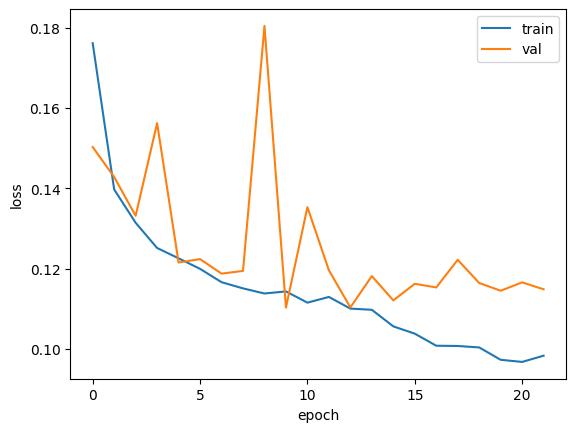

In [10]:
# Convert the pandas dataframes into tensorflow datasets
train_ds = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
valid_ds = tf.data.Dataset.from_tensor_slices((X_val.values, y_val.values))

# Shuffle and batch the datasets
train_ds = train_ds.cache().shuffle(1000).batch(32)
valid_ds = valid_ds.cache().batch(32)

# Define the keras model
l1 = tf.keras.regularizers.l1(1e-4)
nn = keras.models.Sequential([
    keras.layers.Dense(64, input_shape=[X_train.shape[1]],
                       kernel_regularizer=l1),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(32, kernel_regularizer=l1),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(16, kernel_regularizer=l1),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(8, kernel_regularizer=l1),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(y_train.shape[1]), # Adjusted here
])

# Compile the model
nn.compile(optimizer=keras.optimizers.Adam(0.01),
           loss='mse')

# Define callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.5, patience=6,
                                                 verbose=0, mode='auto')
e_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                          patience=12,
                                          restore_best_weights=True)

# Train the model
hist = nn.fit(train_ds,
              validation_data=valid_ds,
              epochs=200,
              callbacks=[reduce_lr, e_stop],
              verbose=0)

# Plot the training and validation loss
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
# Make predictions on the validation set
y_val_pred = nn.predict(X_val)

# Convert the predictions and true values to integer type
y_val_pred = np.argmax(y_val_pred, axis=1)
y_val_true = np.argmax(y_val.values, axis=1)

# Define the target names
target_names = label_encoder.inverse_transform(np.arange(y_train.shape[1]))


# Generate classification report
classification_rep = classification_report(y_val_true, y_val_pred, target_names=target_names)

print(classification_rep)

30/30 [==============================] - 0s 500us/step
              precision    recall  f1-score   support

       Bumps       0.38      0.28      0.33       124
   Dirtiness       0.39      0.73      0.51       144
    K_Scatch       0.83      0.83      0.83       126
Other_Faults       0.20      0.07      0.11       134
      Pastry       0.00      0.00      0.00       139
      Stains       0.39      0.92      0.55       134
   Z_Scratch       0.19      0.12      0.15       142

    accuracy                           0.42       943
   macro avg       0.34      0.42      0.35       943
weighted avg       0.33      0.42      0.35       943



c:\ProgramData\anaconda3\envs\TeamProject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\TeamProject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\TeamProject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
